<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/IMDB_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

In [4]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df.shape

(50000, 2)

In [6]:
Counter(df['sentiment'])

Counter({'negative': 25000, 'positive': 25000})

In [7]:
X=df['review']
y=df['sentiment']

In [8]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [9]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
" ".join([wrd for wrd in re.findall('[a-zA-z]*',X[0].lower()) if len(wrd)>2])

'one the other reviewers has mentioned that after watching just episode you hooked they are right this exactly what happened with the first thing that struck about was its brutality and unflinching scenes violence which set right from the word trust this not show for the faint hearted timid this show pulls punches with regards drugs sex violence its hardcore the classic use the word called that the nickname given the oswald maximum security state penitentary focuses mainly emerald city experimental section the prison where all the cells have glass fronts and face inwards privacy not high the agenda city home many aryans muslims gangstas latinos christians italians irish and more scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal the show due the fact that goes where other shows wouldn dare forget pretty pictures painted for mainstream audiences forget charm forget romance doesn mess around the first episode ever saw struck nasty was s

In [11]:
X.apply(lambda z: " ".join([wrd for wrd in re.findall('[a-zA-z]*',z[0].lower()) if len(wrd)>2]))

0         
1         
2         
3         
4         
        ..
49995     
49996     
49997     
49998     
49999     
Name: review, Length: 50000, dtype: object

In [12]:
X=pd.DataFrame(df['review'],columns=['review'])

In [13]:
X['review']=X['review'].apply(lambda z:" ".join([wrd for wrd in re.findall('[a-zA-z]*',z.lower()) if len(wrd)>2]))

In [14]:
X

,review
0,one the other reviewers has mentioned that aft...
1,wonderful little production the filming techni...
2,thought this was wonderful way spend time too ...
3,basically there family where little boy jake t...
4,petter mattei love the time money visually stu...
...,...
49995,thought this movie did down right good job was...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,going have disagree with the previous comment ...


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
vectorizer=TfidfVectorizer(stop_words=stopwords)

In [26]:
x_train_vect=vectorizer.fit_transform(x_train['review'])

In [27]:
x_train_vect

<40000x90545 sparse matrix of type '<class 'numpy.float64'>'
	with 3838284 stored elements in Compressed Sparse Row format>

In [35]:
vectorizer=TfidfVectorizer(stop_words=stopwords, min_df=0.005,max_df=0.95)

In [36]:
x_train_vect=vectorizer.fit_transform(x_train['review'])

In [37]:
x_train_vect

<40000x2967 sparse matrix of type '<class 'numpy.float64'>'
	with 2825036 stored elements in Compressed Sparse Row format>

In [38]:
x_train_vect.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
x_test_vect= vectorizer.transform(x_test['review'])

In [42]:
pca=PCA()

In [43]:
pca.fit(x_train_vect.A)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.explained_variance_

array([8.00253061e-03, 5.37483293e-03, 4.11327821e-03, ...,
       6.48922475e-05, 5.42885243e-05, 5.09255435e-05])

In [45]:
np.sum(pca.explained_variance_)

0.9519976143815143

In [46]:
len(pca.components_)

2967

In [47]:
x_train_pca=pca.transform(x_train_vect.A)

In [48]:
x_train_pca

array([[-0.03889264, -0.04934088,  0.00103798, ..., -0.00397549,
         0.00134087, -0.00688998],
       [-0.049765  , -0.05758212, -0.03019816, ...,  0.00422394,
        -0.00159423, -0.00154339],
       [ 0.03922512, -0.11139732,  0.08002306, ..., -0.00208478,
        -0.00498014,  0.00078811],
       ...,
       [-0.09128677, -0.04851965, -0.03853497, ...,  0.00032135,
         0.00395054, -0.00117653],
       [-0.04557383,  0.11846056,  0.04224606, ..., -0.0062217 ,
         0.00355931,  0.00077109],
       [-0.00787652, -0.08060582, -0.03610252, ...,  0.00059422,
        -0.00083284,  0.00089621]])

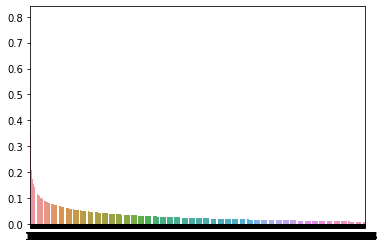

In [49]:
sns.barplot(np.arange(len(pca.components_)),pca.explained_variance_*100)

In [50]:
pd.DataFrame(pca.explained_variance_,columns=['explained variance'])

,explained variance
0,0.008003
1,0.005375
2,0.004113
3,0.003604
4,0.003351
...,...
2962,0.000069
2963,0.000066
2964,0.000065
2965,0.000054


In [51]:
df_pca=pd.DataFrame(pca.explained_variance_,columns=['explained Variance'])

In [52]:
df_pca['total_var']= df_pca['explained Variance'].cumsum()

In [53]:
df_pca

,explained Variance,total_var
0,0.008003,0.008003
1,0.005375,0.013377
2,0.004113,0.017491
3,0.003604,0.021095
4,0.003351,0.024446
...,...,...
2962,0.000069,0.951761
2963,0.000066,0.951828
2964,0.000065,0.951892
2965,0.000054,0.951947


In [54]:
df_pca[df_pca['total_var']< 0.8]

,explained Variance,total_var
0,0.008003,0.008003
1,0.005375,0.013377
2,0.004113,0.017491
3,0.003604,0.021095
4,0.003351,0.024446
...,...,...
1772,0.000184,0.799248
1773,0.000184,0.799432
1774,0.000184,0.799616
1775,0.000184,0.799800


In [55]:
pca=PCA(n_components=1777) #explains 80% of the variance in data

In [56]:
x_train_pca= pca.fit_transform(x_train_vect.A)

In [57]:
x_train_pca

array([[-0.03889263, -0.04934086,  0.00103805, ..., -0.00984233,
         0.00643583,  0.00582737],
       [-0.049765  , -0.05758214, -0.03019821, ...,  0.02529254,
         0.00020474,  0.01874983],
       [ 0.03922512, -0.11139732,  0.08002303, ...,  0.00276799,
        -0.00760887,  0.008681  ],
       ...,
       [-0.09128677, -0.04851964, -0.03853503, ...,  0.01114872,
        -0.01929498,  0.00151465],
       [-0.04557383,  0.11846056,  0.04224604, ..., -0.00148356,
         0.00377164,  0.01500611],
       [-0.00787652, -0.08060582, -0.03610252, ..., -0.01049041,
         0.02436718, -0.00418089]])

In [58]:
x_test_pca= pca.transform(x_test_vect.A)

In [59]:
x_test_pca

array([[-0.04119297,  0.00027356, -0.01692393, ...,  0.00104178,
        -0.02619637,  0.00946279],
       [-0.02385713,  0.13570343,  0.0016669 , ..., -0.01342911,
         0.00844461,  0.00370926],
       [ 0.0334264 ,  0.00146189,  0.07366926, ...,  0.01941952,
         0.01868207,  0.00264764],
       ...,
       [-0.13805285,  0.17875716,  0.08199429, ..., -0.00536614,
         0.01262747,  0.00764626],
       [ 0.00189511, -0.04569578, -0.02074221, ..., -0.01877074,
         0.00142466, -0.01047939],
       [ 0.15247654,  0.02389153,  0.02418045, ...,  0.01037932,
         0.00571098, -0.01689987]])

In [60]:
model_pca=LogisticRegression()
model_pca.fit(x_train_pca,y_train)
print(metrics.classification_report(y_test,model_pca.predict(x_test_pca)))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5044
    positive       0.88      0.90      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [61]:
model_2=LogisticRegression()
model_2.fit(x_train_vect,y_train)
print(metrics.classification_report(y_test,model_2.predict(x_test_vect)))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      5044
    positive       0.88      0.90      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [63]:
comp_matrix= pd.DataFrame(x_train_pca,columns=['comp_{}'.format(i) for i in range(len(pca.components_))])

In [64]:
comp_matrix

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10,comp_11,comp_12,comp_13,comp_14,comp_15,comp_16,comp_17,comp_18,comp_19,comp_20,comp_21,comp_22,comp_23,comp_24,comp_25,comp_26,comp_27,comp_28,comp_29,comp_30,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,comp_37,comp_38,comp_39,...,comp_1737,comp_1738,comp_1739,comp_1740,comp_1741,comp_1742,comp_1743,comp_1744,comp_1745,comp_1746,comp_1747,comp_1748,comp_1749,comp_1750,comp_1751,comp_1752,comp_1753,comp_1754,comp_1755,comp_1756,comp_1757,comp_1758,comp_1759,comp_1760,comp_1761,comp_1762,comp_1763,comp_1764,comp_1765,comp_1766,comp_1767,comp_1768,comp_1769,comp_1770,comp_1771,comp_1772,comp_1773,comp_1774,comp_1775,comp_1776
0,-0.038893,-0.049341,0.001038,0.050060,-0.034728,-0.016919,0.014451,-0.093760,0.009342,-0.097141,0.087507,-0.039767,-0.008753,0.038036,0.033657,0.002155,0.014749,0.010952,-0.053837,-0.004456,0.057016,-0.023086,0.025587,0.035679,0.045927,0.000643,0.015708,0.003863,-0.004130,-0.022253,-0.012321,0.001159,-0.029891,-0.055103,0.015640,0.008143,-0.046661,0.059189,0.046712,0.007796,...,-0.015662,0.001950,0.004524,-0.021618,-0.018383,0.013651,0.008946,-0.006349,-0.016689,0.009033,0.022678,-0.001619,0.001693,-0.009873,-0.002292,0.007017,-0.018964,0.002031,0.008849,0.005783,-0.004896,-0.005164,0.006111,-0.000425,0.000026,0.004163,0.010940,0.006859,-0.026893,0.030659,-0.009070,0.029174,0.003372,-0.018077,0.002807,0.002193,-0.012692,-0.009842,0.006436,0.005827
1,-0.049765,-0.057582,-0.030198,0.126271,-0.020006,0.086628,0.006480,0.049170,-0.127128,-0.033505,-0.089666,-0.033131,0.013639,-0.021279,-0.008914,-0.006428,0.002721,0.030316,-0.000561,0.022882,0.036332,-0.001305,0.023878,0.009194,-0.023680,0.108843,-0.069166,0.082508,-0.014024,-0.005525,-0.127728,-0.009807,0.071418,-0.003288,-0.005940,-0.067221,0.117099,-0.051873,0.012652,-0.011501,...,0.022079,-0.011400,-0.004673,0.021017,-0.021368,0.002742,-0.008422,-0.006184,0.002817,-0.014520,-0.019417,-0.015154,-0.004887,-0.021363,-0.026353,0.026639,-0.019884,0.005019,-0.026575,-0.028496,0.002681,-0.016232,0.014481,-0.010969,0.014800,0.013692,-0.000067,0.008543,-0.008030,-0.001080,0.030291,0.015007,0.019476,-0.022833,-0.008566,0.014608,0.017117,0.025293,0.000205,0.018750
2,0.039225,-0.111397,0.080023,0.027552,0.050446,0.047204,0.089203,-0.011715,-0.000442,-0.033135,0.049823,-0.090628,0.045659,0.047206,0.138542,0.021663,0.001373,0.025829,0.018191,0.007865,-0.056686,-0.032877,-0.051954,0.099232,0.044206,0.023897,-0.049536,0.039345,0.060528,-0.095354,0.008869,0.056582,-0.048989,0.062902,-0.013823,-0.034917,-0.091441,-0.045244,0.018353,-0.029178,...,0.003586,0.022950,-0.004824,0.010535,-0.016507,-0.017012,-0.024897,0.034864,-0.002634,0.004553,0.007953,0.002070,0.009378,0.004540,0.014515,-0.006873,-0.005109,-0.006455,-0.004913,-0.005643,0.010783,0.000275,0.001176,0.011803,0.017973,0.012558,-0.003673,0.011212,0.017411,0.004735,-0.004175,0.001476,0.007879,-0.024118,-0.005553,-0.001283,-0.013551,0.002768,-0.007609,0.008681
3,-0.122969,0.044324,0.014576,-0.016298,-0.064156,0.013888,0.001548,0.073959,-0.003486,-0.079379,0.040757,0.031104,0.039107,0.072876,-0.012275,0.026996,0.007389,0.014271,0.008610,-0.046926,-0.001731,-0.031004,-0.001958,0.009158,0.006739,0.079800,0.037402,-0.032915,0.060788,-0.065726,-0.010107,-0.004333,-0.034514,0.029194,-0.013642,0.029734,-0.037504,-0.041909,-0.024835,-0.022539,...,-0.025555,0.002383,-0.010320,0.008518,0.007294,0.011306,0.004713,0.021596,-0.004015,-0.009183,0.003425,0.000570,-0.006183,0.027732,-0.001440,0.004006,0.007761,0.008780,0.001280,0.009410,0.006007,0.000453,0.007706,-0.003884,0.028223,-0.012414,-0.011118,0.001120,0.009161,-0.002588,0.025169,-0.010942,-0.004120,-0.011573,0.022150,0.017699,-0.009178,-0.009337,0.011675,-0.000625
4,-0.019731,-0.015280,-0.060210,-0.084429,-0.057083,-0.035325,-0.031466,0.055787,0.008505,0.064682,-0.041750,0.008375,-0.008341,0.049885,-0.046374,0.054915,-0.018852,0.046897,-0.136555,-0.019674,-0.021937,0.070761,-0.026691,0.091011,

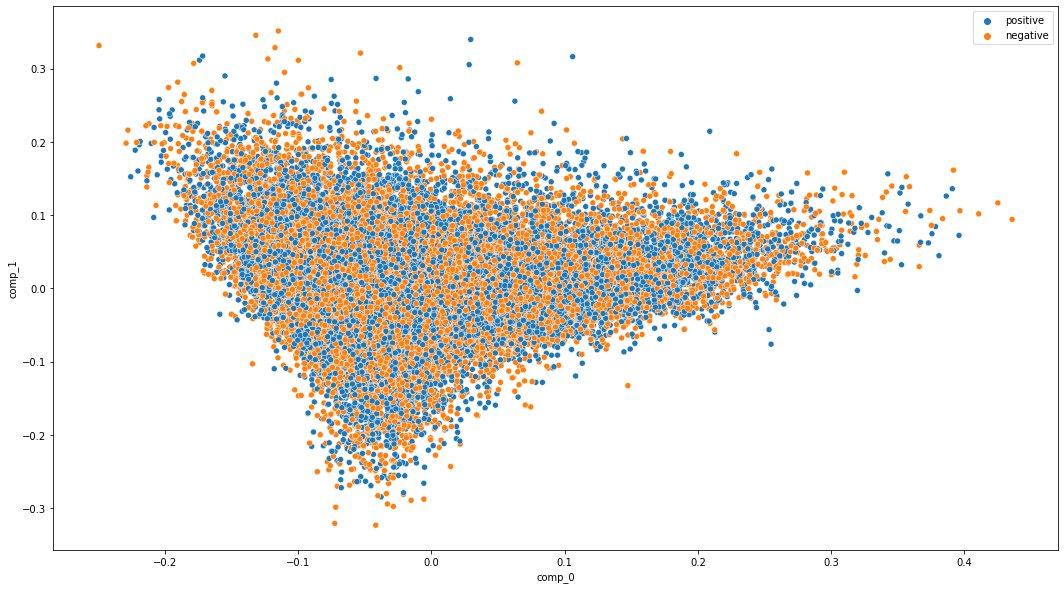

In [72]:
plt.figure(figsize=(18,10))
sns.scatterplot(comp_matrix['comp_0'],comp_matrix['comp_1'], hue=y_train)
plt.legend(loc='best')

In [66]:
pd.unique(y_train)

array(['negative', 'positive'], dtype=object)

In [68]:
tsne=TSNE(n_components=2)
x_train_tsne=tsne.fit_transform(x_train_vect)

In [69]:
x_train_tsne

array([[-17.256495 , -24.008997 ],
       [ 15.709306 ,  36.865765 ],
       [ 13.695616 ,   3.9268885],
       ...,
       [-30.369478 ,  -1.0146643],
       [ 14.466959 ,  -1.1785232],
       [ 18.291239 ,  47.791992 ]], dtype=float32)

In [70]:
x_train_tsne[0]

array([-17.256495, -24.008997], dtype=float32)

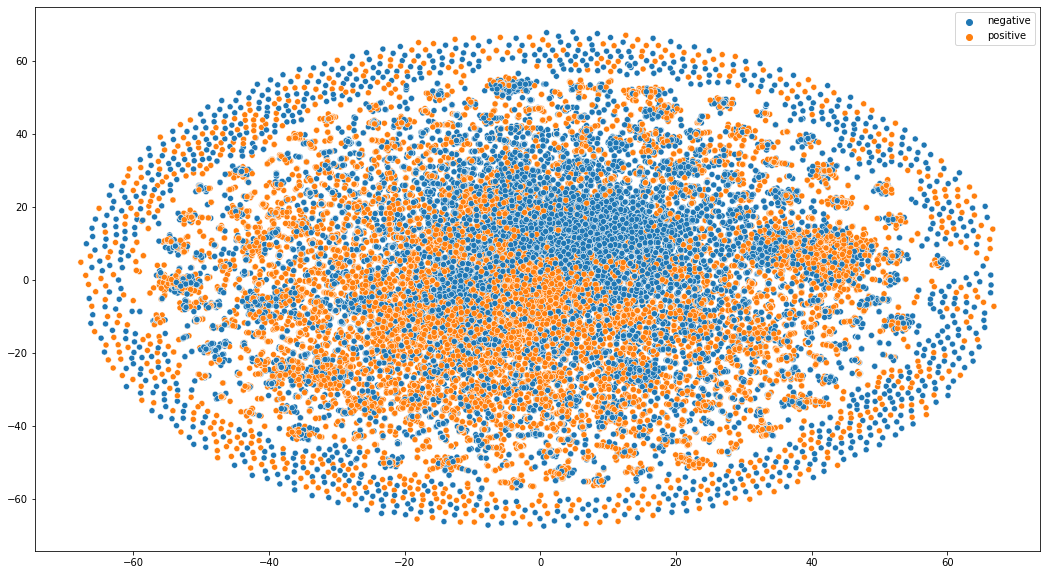

In [71]:
plt.figure(figsize=(18,10))
sns.scatterplot(x_train_tsne[:,0], x_train_tsne[:,1],hue=y_train)
plt.legend(loc='best')